# **Proyek Pertama: Predictive Analytics - Klasifikasi Penyakit Diabetes**

**Nama: Muhammad Rizqi Azhari**

**Username Dicoding: rizqimrazhari**

# **1. Pendahuluan**

Tahap ini berisi overview proyek, deskripsi dataset, instalasi dependensi, dan import library yang diperlukan.

## **Overview**

**Rumusan Masalah**

- Algoritma atau model machine learning mana yang paling efektif untuk memprediksi diabetes pada dataset ini?
- Faktor-faktor apa saja yang paling signifikan dalam memprediksi apakah seseorang akan menderita diabetes?

**Tujuan**

- Membangun dan mengoptimalkan model machine learning yang dapat memprediksi kemungkinan seseorang menderita diabetes dengan akurat.
- Menemukan dan memahami faktor-faktor utama yang berkontribusi terhadap risiko diabetes, seperti kadar glukosa, insulin, BMI, dan umur.



## **Dataset**

Pima Indians Diabetes Database:

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Dataset Content**

Deskripsi fitur:
- **Pregnancies**: Jumlah kehamilan yang dialami oleh individu wanita.
- **Glucose**: Kadar glukosa dalam darah yang diukur setelah periode puasa.
- **BloodPressure**: Tekanan darah diastolik, yaitu tekanan darah saat jantung beristirahat di antara denyut.
- **SkinThickness**: Ketebalan lipatan kulit trisep yang diukur dalam milimeter.
- **Insulin**: Kadar insulin serum dua jam setelah tes toleransi glukosa.
- **BMI**: Rasio berat badan (kg) terhadap tinggi badan (m^2).
- **DiabetesPedigreeFunction**: Skor yang memberikan informasi tentang riwayat keluarga dan kemungkinan faktor genetik dalam diabetes.
- **Age**: Usia individu dalam tahun.
- **Outcome**: Indikator binari yang menunjukkan apakah individu tersebut menderita diabetes atau tidak (1: menderita diabetes, 0: tidak menderita diabetes).

## **Install Dependencies & Import Libraries**

In [39]:
# Install Kaggle API
!pip install kaggle -q kaggle

# Install Optuna for Hyperparameter Tuning
!pip install optuna

# Install XGBoost for ensemble learning model
!pip install xgboost

In [40]:
# Import reuqired libraries

# Data loading
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Machine Learning & Statistics
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import optuna

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **2. Data Understanding**

Pada tahap ini dilakukan proses memuat data, memahami informasi dalam data, dan melakukan Exploratory Data Analysis (EDA) untuk menganalisis karakteristik, menemukan pola maupun anomali.

## **2.1. Load Dataset**

In [41]:
# Membuat direktori baru bernama kaggle
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke direktori kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

# Mengubah permission berkas
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d uciml/pima-indians-diabetes-database

# Ekstrak berkas zip
!unzip /content/pima-indians-diabetes-database.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [42]:
# Melihat 5 data teratas
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **2.2. Exploratory Data Analysis (EDA)**

### **Data Description**

In [43]:
# Melihat informasi tipe data
print(df.info())

# Melihat dimensi dataset
print("\n",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

 (768, 9)


Dataset berisi 768 baris dan 9 kolom.

In [44]:
# Melihat sebaran statistik data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### **Data Cleaning / Wrangling**

In [45]:
# Check missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
# Check duplicate values
df.duplicated().sum()

0

Tidak ada data duplikat maupun kosong.

In [48]:
# Membuat salinan dataframe
df_before = df.copy()

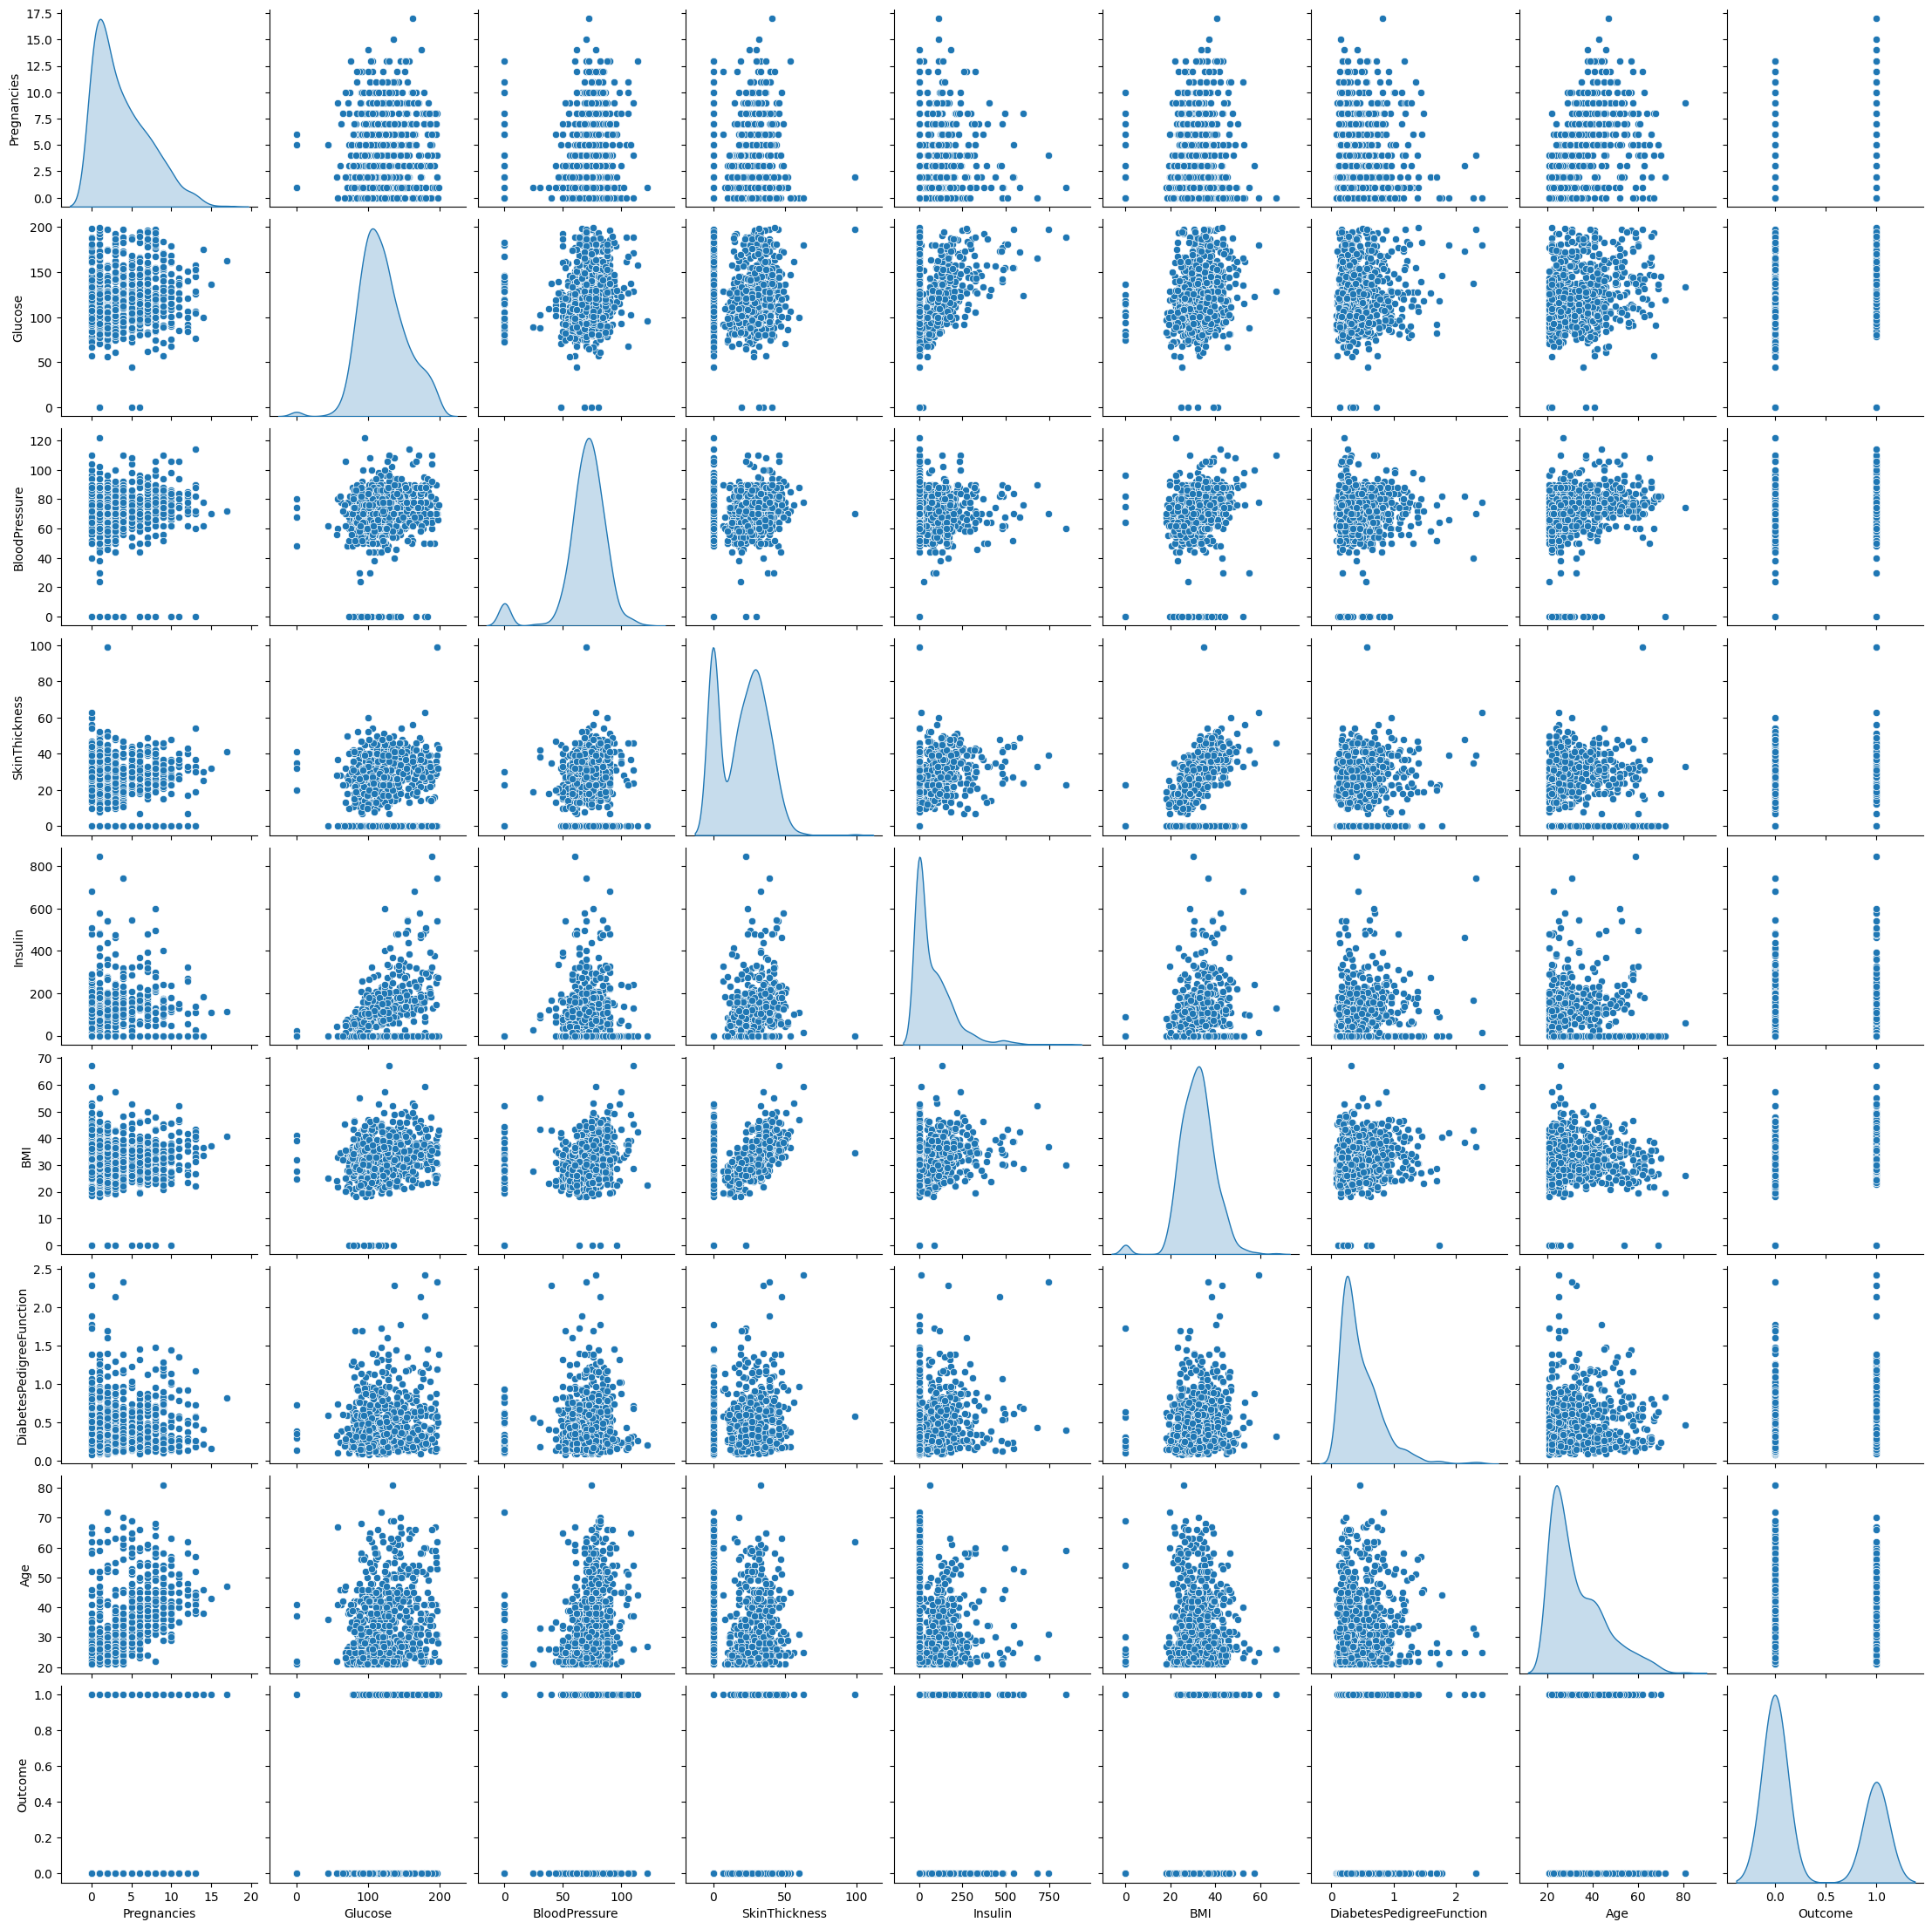

In [63]:
sns.pairplot(df_before, diag_kind='kde')

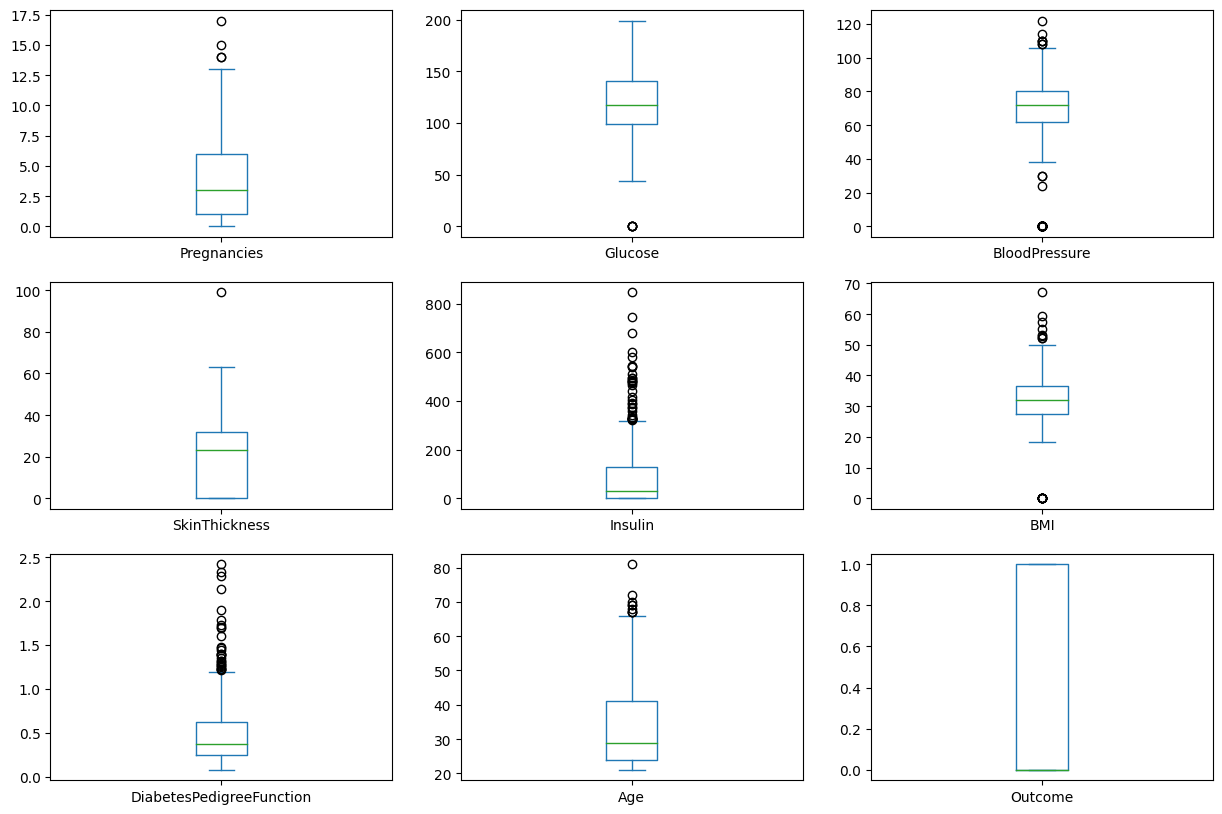

In [47]:
# Outlier detection using boxplot / IQR
df.plot(kind='box', layout=(3, 3), figsize=(15,10), subplots=True, sharex=False, sharey=False)
plt.show()

Terdapat outliers pada beberapa fitur

In [49]:
# Visualisasi box plot sebelum cleaning
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns:
  fig = px.box(df_before, x=[col], title=f'Box Plot dari {col} sebelum cleaning')
  fig.show()

In [50]:
# Handling outliers using IQR
def handle_outliers_iqr(df, column):
    """
    Menangani outliers dengan cara mengganti nilai outliers agar tidak melebihi batas atas dan batas bawah.

    Parameters:
        df (DataFrame): DataFrame yang berisi data.
        column: Kolom atau fitur dari DataFrame yang ingin dibersihkan

    Returns:
        df (DataFrame): DataFrame yang telah dimodifikasi dengan outliers yang disesuaikan nilainya.
        outliers (DataFrame): DataFrame yang berisi outliers yang telah diidentifikasi dan disesuaikan nilainya.
    """
    # Calculate first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Handle outliers by capping them to the lower and upper bounds
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

    # Return the modified DataFrame and the outliers removed
    return df, outliers

Data outliers tidak di drop, melainkan hanya diganti nilainya agar tidak melebihi batas atas dan batas bawah.

In [51]:
# Handle outliers di kolom tertentu
# Visualisasi box plot sebelum cleaning
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns:
  handle_outliers_iqr(df, col)

In [52]:
# Visualisasi box plot setelah cleaning
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns:
  fig = px.box(df, x=[col], title=f'Box Plot dari {col} setelah cleaning')
  fig.show()

In [53]:
# Melihat dimensi data setelah dibersihkan
df.shape

(768, 9)

### **Univariate Analysis**

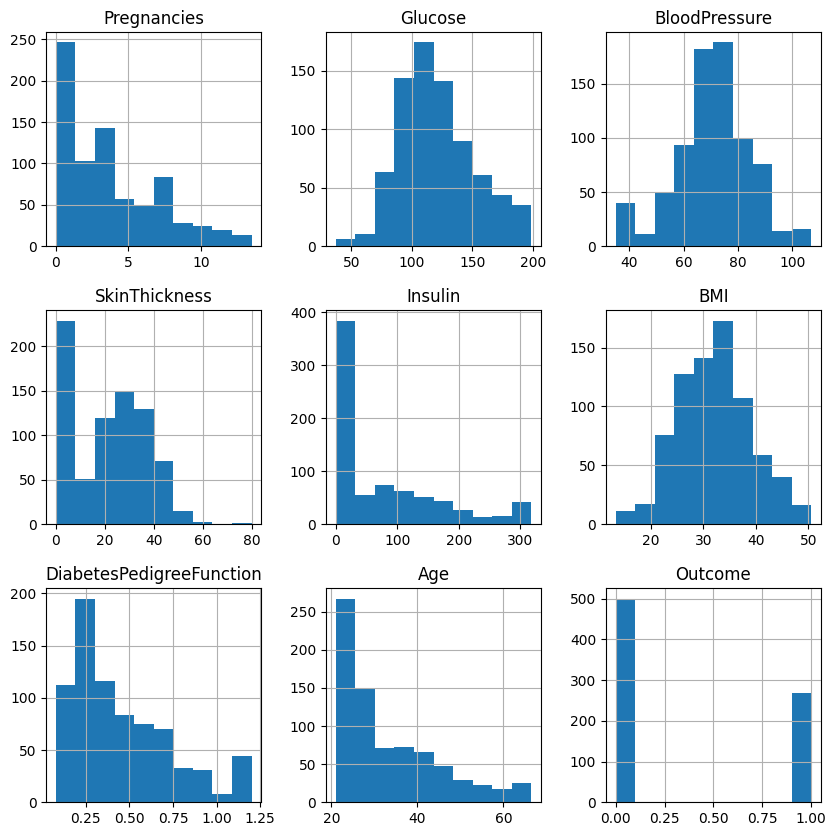

In [54]:
# Melihat distribusi data setelah cleaning
df.hist(figsize=(10, 10))
plt.show()

Kebanyakan fitur memiliki distribusi data yang condong ke kiri (left-skewed).

### **Bivariate Analysis**

In [60]:
def anova(df, feature_1, feature_2):
    """
    Melakukan analysis of variance (ANOVA) dengan membandingkan dua fitur dalam DataFrame.

    Parameters:
        df (DataFrame): DataFrame yang berisi data.
        feature1 (str): Nama fitur pertama yang ingin dianalisis.
        feature2 (str): Nama fitur kedua yang ingin dianalisis.

    Returns:
        None
    """
    F_statistic = (f_oneway(df[feature_1], df[feature_2])[0])
    p_value = (f_oneway(df[feature_1], df[feature_2])[1])

    print(f"Hasil ANOVA antara {feature_1} dan {feature_2}")
    print("Nilai F:", F_statistic)
    print("Nilai p:", p_value)

In [61]:
# Melakukan analysis of variance (ANOVA) satu arah
anova(df, 'Outcome', 'Glucose')
print()
anova(df, 'Outcome', 'Insulin')
print()
anova(df, 'Outcome', 'Age')
print()
anova(df, 'Glucose', 'Insulin')

Hasil ANOVA antara Outcome dan Glucose
Nilai F: 11517.06353651594
Nilai p: 0.0

Hasil ANOVA antara Outcome dan Insulin
Nilai F: 471.27308894551675
Nilai p: 2.4179551988540604e-91

Hasil ANOVA antara Outcome dan Age
Nilai F: 6119.075902938475
Nilai p: 0.0

Hasil ANOVA antara Glucose dan Insulin
Nilai F: 177.9810323706715
Nilai p: 1.7079403454871564e-38


Hasil ANOVA menunjukkan nilai p yang sangat kecil, ini menunjukkan bahwa H0 (tidak ada hubungan antar fitur) terbantahkan.

### **Multivariate Analysis**

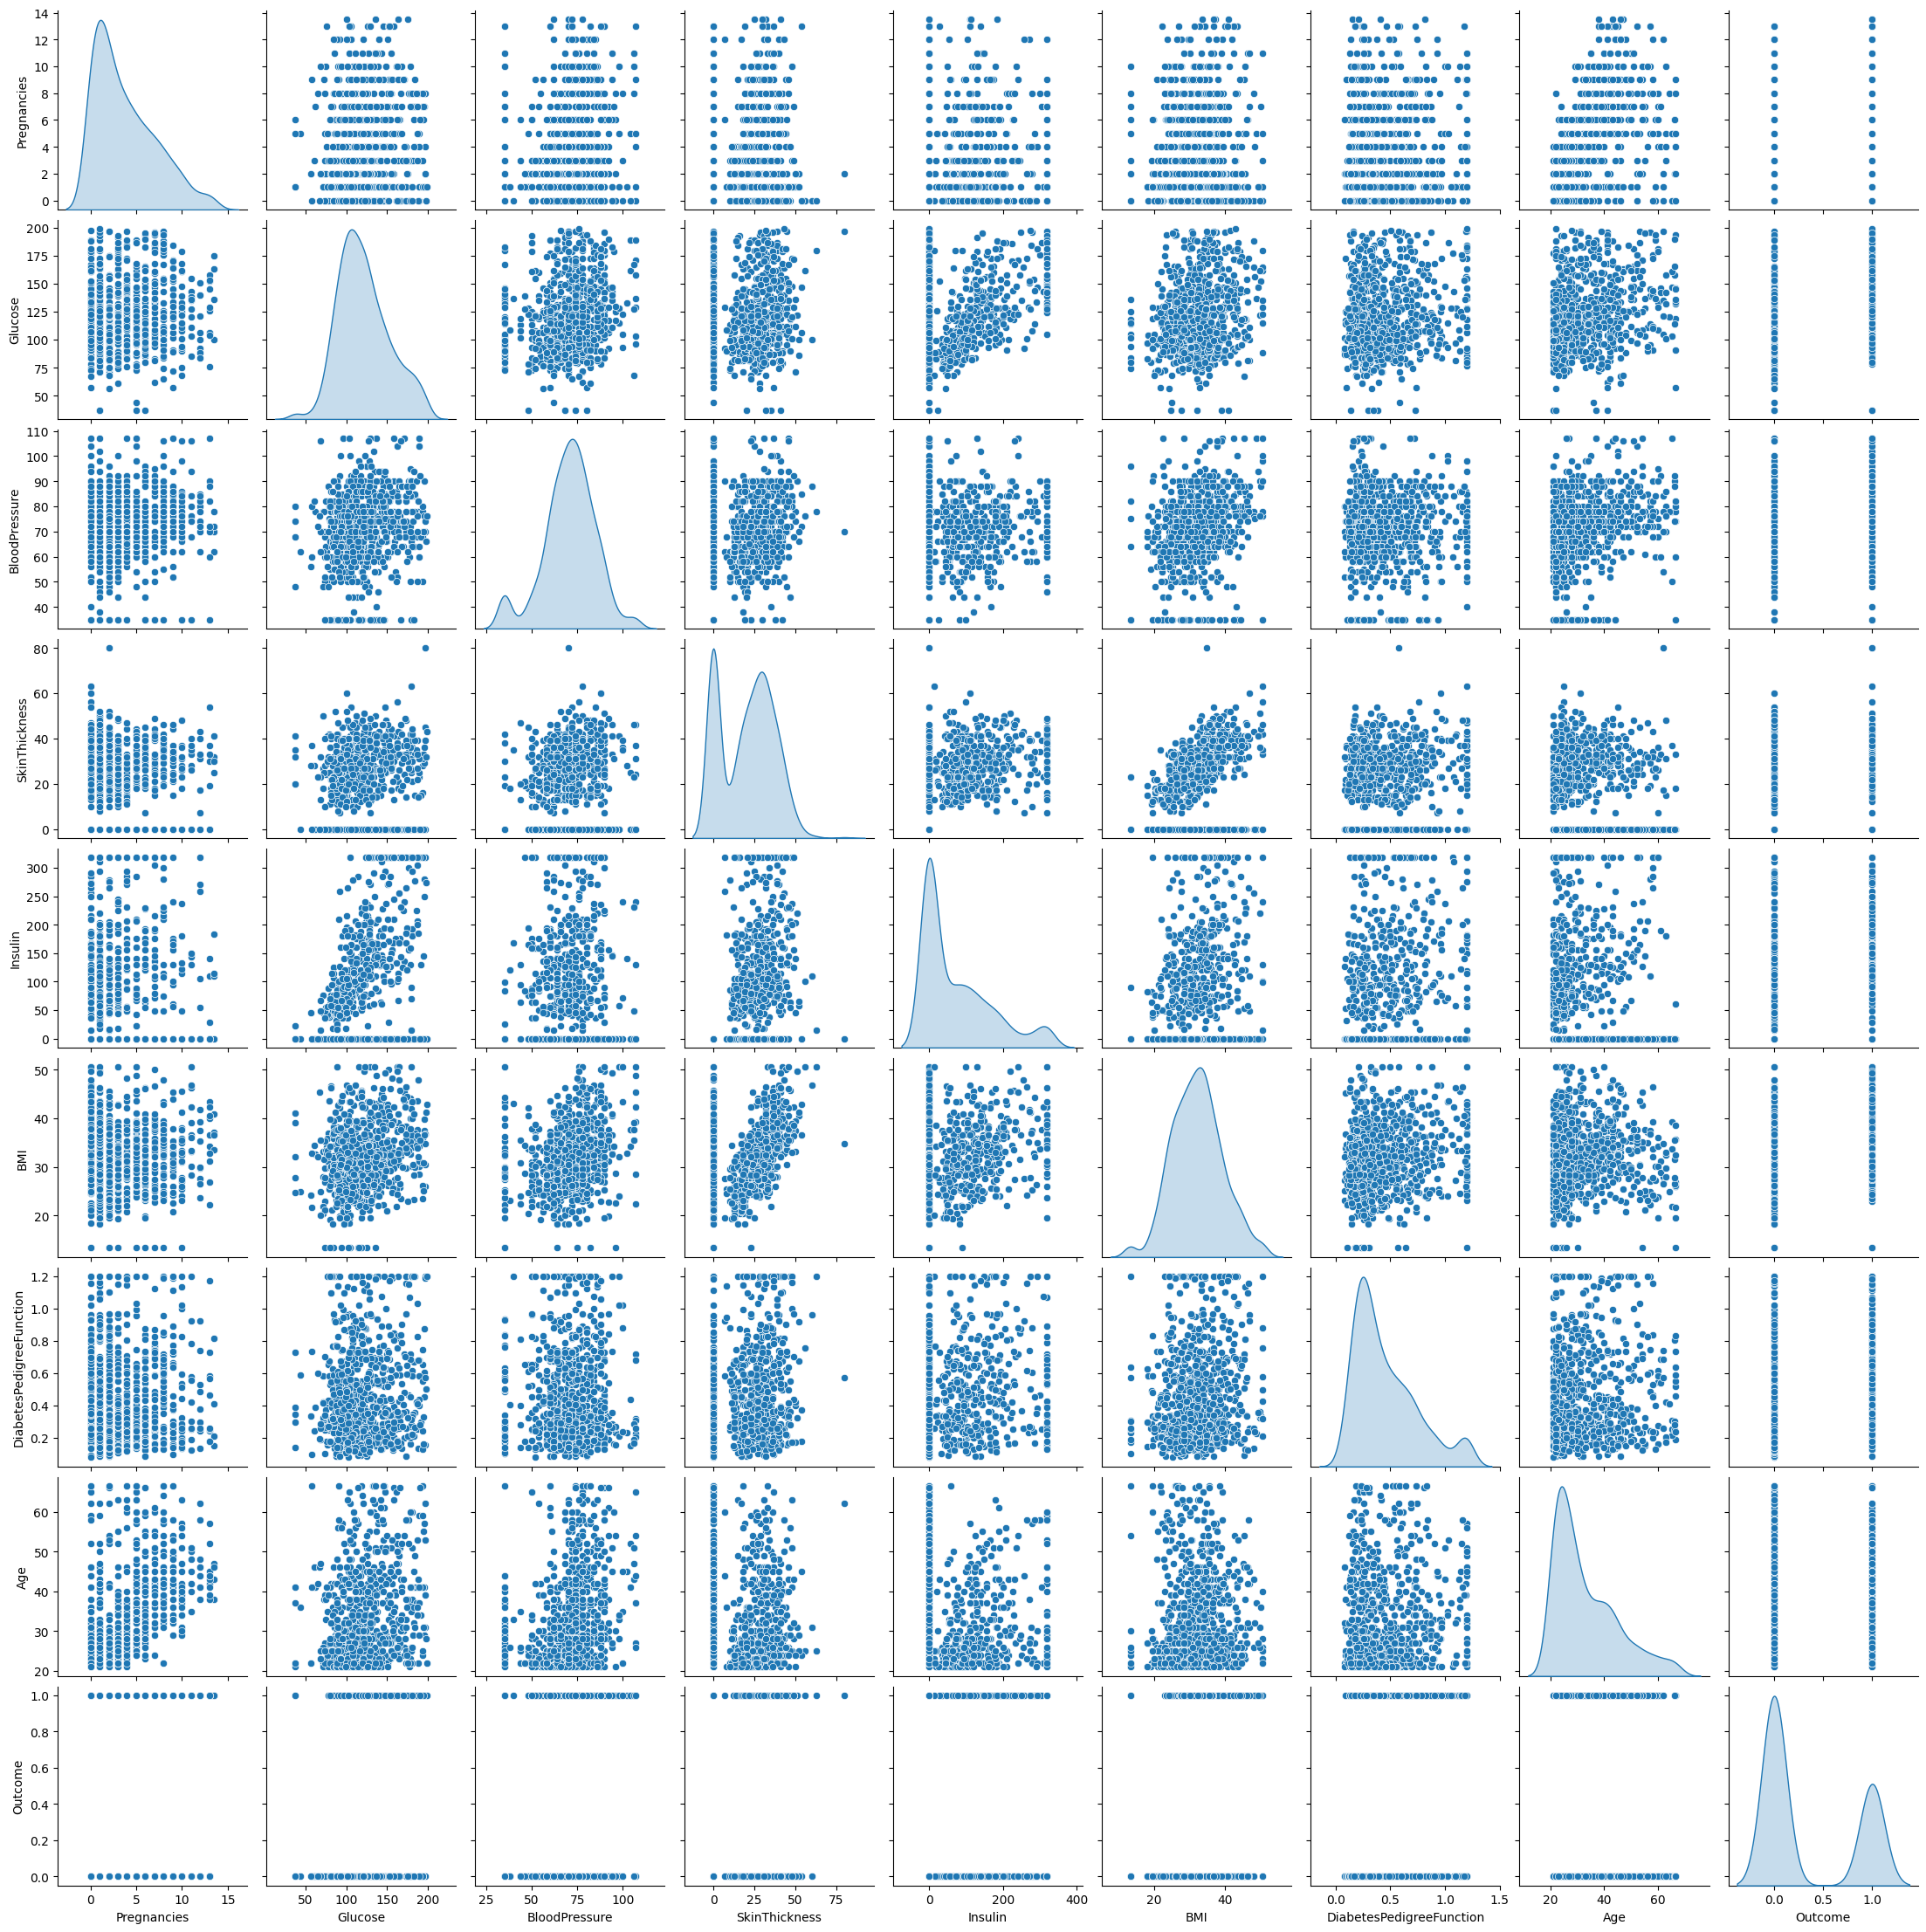

In [22]:
# Melihat korelasi antar fitur menggunakan pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

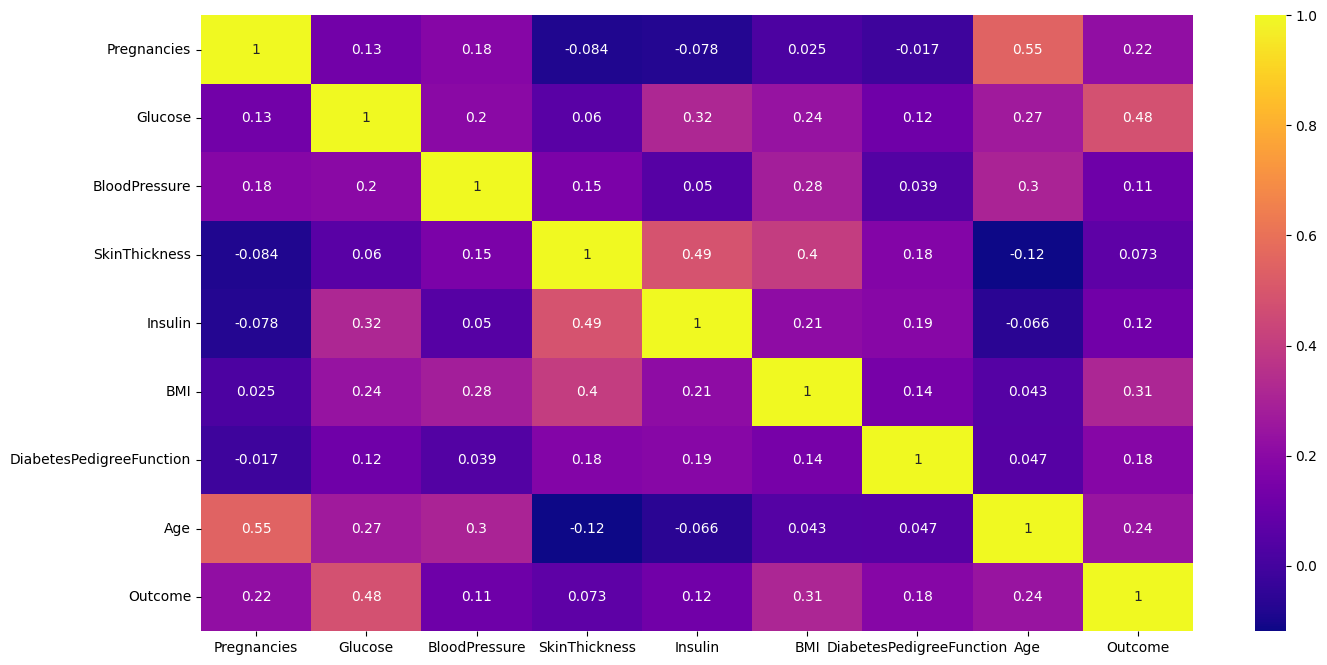

In [23]:
# Correlation matrix / heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.plasma)
plt.show()

Dari matriks korelasi, dapat dilihat fitur-fitur yang memiliki pengaruh signifikan terhadap diabetes adalah Glucose, BMI dan Age. Selain itu, Insulin juga memiliki pengaruh terhadap kadar Glucose.

# **3. Data Preprocessing**

Tahap ini bertujuan untuk mempersiapkan data sebelum masuk ke tahap pengembangan model Machine Learning.

## **Train Test Split**

In [110]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

print(X.shape)
print(y.shape)

(768, 8)
(768,)


Karena ukuran data yang kecil, maka ditetapkan porsi data untuk training dan testing masing-masing 90% dan 10%.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print(f'Jumlah data training: {len(X_train)}')
print(f'Jumlah data testing: {len(X_test)}')

Jumlah data training: 691
Jumlah data testing: 77


In [95]:
print(X_train)
print("\n=========================================================================\n")
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
396          3.0     96.0             56             34    115.0  24.7   
528          0.0    117.0             66             31    188.0  30.8   
10           4.0    110.0             92              0      0.0  37.6   
192          7.0    159.0             66              0      0.0  30.4   
448          0.0    104.0             64             37     64.0  33.6   
..           ...      ...            ...            ...      ...   ...   
71           5.0    139.0             64             35    140.0  28.6   
106          1.0     96.0            107              0      0.0  22.4   
270         10.0    101.0             86             37      0.0  45.6   
435          0.0    141.0             35              0      0.0  42.4   
102          0.0    125.0             96              0      0.0  22.5   

     DiabetesPedigreeFunction   Age  
396                     0.944  39.0  
528                     0.493  22.0

## **Scaling / Normalisasi**

In [113]:
# Feature scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
columns = X_train.columns

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train, columns=columns)
X_test_scaled = pd.DataFrame(X_test, columns=columns)

In [114]:
print(X_train_scaled)
print("\n=========================================================================\n")
print(X_test_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.222222  0.363707       0.291667       0.539683  0.361493  0.305108   
1       0.000000  0.493436       0.430556       0.492063  0.590963  0.469086   
2       0.296296  0.450193       0.791667       0.000000  0.000000  0.651882   
3       0.518519  0.752896       0.430556       0.000000  0.000000  0.458333   
4       0.000000  0.413127       0.402778       0.587302  0.201179  0.544355   
..           ...       ...            ...            ...       ...       ...   
686     0.370370  0.629344       0.402778       0.555556  0.440079  0.409946   
687     0.074074  0.363707       1.000000       0.000000  0.000000  0.243280   
688     0.740741  0.394595       0.708333       0.587302  0.000000  0.866935   
689     0.000000  0.641699       0.000000       0.000000  0.000000  0.780914   
690     0.000000  0.542857       0.847222       0.000000  0.000000  0.245968   

     DiabetesPedigreeFunction       Age

# **4. Modeling**

Algoritma yang akan dipakai:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. Extreme Gradient Boosting (XGBoost)

Metrik yang digunakan adalah Akurasi, Precision, Recall, dan F1-score, namun metrik yang menjadi prioritas adalah Recall karena kita ingin meminimalkan false negative (FN), artinya kita ingin memastikan bahwa semua kasus diabetes yang sebenarnya positif diidentifikasi dengan benar.

## **Base Model**

In [61]:
# Inisialisasi model
log_reg = LogisticRegression()
svm = SVC()
xgb = XGBClassifier()

In [203]:
def evaluate_skf(model, X, y, n_splits=10, random_state=42, verbose=True):
    """
    Evaluasi model dengan Stratified K-Fold Cross-Validation dan menghitung metrik kinerja.

    Parameters:
        model: estimator
            Model machine learning yang akan dilatih dan dievaluasi.
        X: array-like, shape (n_samples, n_features)
            Fitur input.
        y: array-like, shape (n_samples,)
            Target output.
        n_splits: int, optional (default=10)
            Jumlah lipatan (folds) untuk cross-validation.
        random_state: int, optional (default=42)
            Seed untuk pengacakan dalam cross-validation.
        verbose: bool, optional (default=True)
            Jika True, hasil evaluasi tiap fold akan ditampilkan.

    Returns:
        dict: Rata-rata metrik kinerja dari semua lipatan
    """
    # Membuat objek StratifiedKFold untuk cross-validation dengan stratifikasi
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Inisialisasi list untuk menyimpan metrik kinerja pada setiap lipatan
    accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

    fold = 1

    if verbose:
      print(type(model).__name__, "\n")

    # Loop melalui setiap lipatan cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        # Memisahkan data menjadi set pelatihan dan pengujian
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Melatih model pada data pelatihan
        model.fit(X_train, y_train)

        # Membuat prediksi pada data pengujian
        y_pred = model.predict(X_val)

        # Menghitung metrik kinerja
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Menyimpan metrik kinerja dalam list
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        if verbose:
          # Menampilkan metrik kinerja untuk setiap lipatan
          print(f'===== Fold {fold} =====')
          print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 score: {f1}\n')
          fold += 1

    # Menghitung rata-rata metrik kinerja dari semua lipatan
    mean_accuracy = np.mean(accuracy_list)
    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)
    mean_f1 = np.mean(f1_list)

    # Menampilkan rata-rata metrik kinerja
    # print(f'Mean Accuracy: {mean_accuracy}, \nMean Precision: {mean_precision}, \nMean Recall: {mean_recall}, \nMean F1 score: {mean_f1}')

    # Mengembalikan rata-rata metrik kinerja
    return {
        'mean_accuracy': mean_accuracy,
        'mean_precision': mean_precision,
        'mean_recall': mean_recall,
        'mean_f1': mean_f1
    }

In [202]:
# Evaluate Logistic Regression model
evaluate_skf(log_reg, X_train_scaled, y_train)

LogisticRegression 

===== Fold 1 =====
Accuracy: 0.7857142857142857, Precision: 0.75, Recall: 0.6, F1 score: 0.6666666666666665

===== Fold 2 =====
Accuracy: 0.7391304347826086, Precision: 0.65, Recall: 0.5416666666666666, F1 score: 0.5909090909090908

===== Fold 3 =====
Accuracy: 0.8260869565217391, Precision: 0.875, Recall: 0.5833333333333334, F1 score: 0.7000000000000001

===== Fold 4 =====
Accuracy: 0.782608695652174, Precision: 0.7142857142857143, Recall: 0.625, F1 score: 0.6666666666666666

===== Fold 5 =====
Accuracy: 0.7971014492753623, Precision: 0.75, Recall: 0.625, F1 score: 0.6818181818181818

===== Fold 6 =====
Accuracy: 0.7681159420289855, Precision: 0.6818181818181818, Recall: 0.625, F1 score: 0.6521739130434783

===== Fold 7 =====
Accuracy: 0.7681159420289855, Precision: 0.7, Recall: 0.5833333333333334, F1 score: 0.6363636363636365

===== Fold 8 =====
Accuracy: 0.7536231884057971, Precision: 0.6842105263157895, Recall: 0.5416666666666666, F1 score: 0.6046511627906976



{'mean_accuracy': 0.7771221532091097,
 'mean_precision': 0.733864775575302,
 'mean_recall': 0.5766666666666667,
 'mean_f1': 0.6437344556353657}

In [184]:
# Evaluate SVM model
evaluate_skf(svm, X_train_scaled, y_train)

SVC 

===== Fold 1 =====
Accuracy: 0.7428571428571429, Precision: 0.7058823529411765, Recall: 0.48, F1 score: 0.5714285714285713

===== Fold 2 =====
Accuracy: 0.7246376811594203, Precision: 0.6190476190476191, Recall: 0.5416666666666666, F1 score: 0.5777777777777778

===== Fold 3 =====
Accuracy: 0.7971014492753623, Precision: 0.8571428571428571, Recall: 0.5, F1 score: 0.631578947368421

===== Fold 4 =====
Accuracy: 0.782608695652174, Precision: 0.7647058823529411, Recall: 0.5416666666666666, F1 score: 0.6341463414634146

===== Fold 5 =====
Accuracy: 0.8260869565217391, Precision: 0.7727272727272727, Recall: 0.7083333333333334, F1 score: 0.7391304347826088

===== Fold 6 =====
Accuracy: 0.7536231884057971, Precision: 0.6666666666666666, Recall: 0.5833333333333334, F1 score: 0.6222222222222222

===== Fold 7 =====
Accuracy: 0.782608695652174, Precision: 0.6956521739130435, Recall: 0.6666666666666666, F1 score: 0.6808510638297872

===== Fold 8 =====
Accuracy: 0.7681159420289855, Precision: 

{'mean_accuracy': 0.7655900621118011,
 'mean_precision': 0.7151878300727404,
 'mean_recall': 0.5563333333333333,
 'mean_f1': 0.6212498765349677}

In [185]:
# Evaluate XGBoost model
evaluate_skf(xgb, X_train_scaled, y_train)

XGBClassifier 

===== Fold 1 =====
Accuracy: 0.6714285714285714, Precision: 0.55, Recall: 0.44, F1 score: 0.48888888888888893

===== Fold 2 =====
Accuracy: 0.6811594202898551, Precision: 0.5357142857142857, Recall: 0.625, F1 score: 0.576923076923077

===== Fold 3 =====
Accuracy: 0.7391304347826086, Precision: 0.6875, Recall: 0.4583333333333333, F1 score: 0.5499999999999999

===== Fold 4 =====
Accuracy: 0.7536231884057971, Precision: 0.64, Recall: 0.6666666666666666, F1 score: 0.6530612244897959

===== Fold 5 =====
Accuracy: 0.7391304347826086, Precision: 0.6153846153846154, Recall: 0.6666666666666666, F1 score: 0.64

===== Fold 6 =====
Accuracy: 0.7391304347826086, Precision: 0.625, Recall: 0.625, F1 score: 0.625

===== Fold 7 =====
Accuracy: 0.782608695652174, Precision: 0.6666666666666666, Recall: 0.75, F1 score: 0.7058823529411765

===== Fold 8 =====
Accuracy: 0.7536231884057971, Precision: 0.6666666666666666, Recall: 0.5833333333333334, F1 score: 0.6222222222222222

===== Fold 9 ==

{'mean_accuracy': 0.7381573498964803,
 'mean_precision': 0.6290265567765567,
 'mean_recall': 0.6148333333333332,
 'mean_f1': 0.6180004976349515}

Tanpa dilakukan hyperparameter tuning, model yang memberikan performa terbaik adalah XGBoost dengan rata-rata skor recall 61.5%

## **Hyperparameter Tuning**

In [213]:
def objective(trial):
    """
    Mendefinisikan ruang pencarian hyperparameter dan mengevaluasi model menggunakan cross-validation
    dalam proses tuning hyperparameter dengan Optuna.

    Parameters:
        trial : optuna.trial.Trial
            Objek trial dari Optuna yang menyediakan interface untuk mendefinisikan ruang pencarian hyperparameter.

    Returns:
        float
            Nilai recall rata-rata dari hasil cross-validation, yang digunakan sebagai metrik objektif
            untuk dioptimalkan oleh Optuna.
    """
    # Definisikan ruang pencarian untuk hyperparameter
    if type(model) == LogisticRegression:
        penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
        solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
        param = {
            "C": trial.suggest_loguniform("C", 1e-5, 100),
            "penalty": penalty,
            "solver": solver
        }
        model.set_params(**param)
    elif type(model) == SVC:
        param = {
            "C": trial.suggest_loguniform("C", 1e-5, 100),
            "kernel": trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
        }
        model.set_params(**param)
    elif type(model) == XGBClassifier:
        param = {
            "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1),
            "max_depth": trial.suggest_int("max_depth", 1, 10),
            "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
            "min_child_weight": trial.suggest_loguniform("min_child_weight", 1e-5, 100)
        }
        model.set_params(**param)

    # Evaluasi model dengan cross-validation
    metrics = evaluate_skf(model, X_train_scaled, y_train, verbose=False)

    return metrics['mean_recall']

In [208]:
best_params = {}

for model in [log_reg, svm, xgb]:
    print(f"\nTuning {type(model).__name__}\n")
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    best_params[type(model).__name__] = study.best_params
    print(f"\nBest hyperparameters for {type(model).__name__}: ", study.best_params)

[I 2024-06-02 19:38:22,897] A new study created in memory with name: no-name-6587cf97-8737-4e74-8d5d-12f6065ecc91
[I 2024-06-02 19:38:23,092] Trial 0 finished with value: 0.0 and parameters: {'penalty': 'l2', 'C': 2.0342966443171987e-05}. Best is trial 0 with value: 0.0.



Tuning LogisticRegression



[I 2024-06-02 19:38:23,282] Trial 1 finished with value: 0.0 and parameters: {'penalty': 'l2', 'C': 0.007699010781731839}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:38:23,467] Trial 2 finished with value: 0.0 and parameters: {'penalty': 'l2', 'C': 5.566963836721856e-05}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:38:23,638] Trial 3 finished with value: 0.0 and parameters: {'penalty': 'l1', 'C': 0.00039555035514117975}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:38:23,831] Trial 4 finished with value: 0.0 and parameters: {'penalty': 'l2', 'C': 1.0052403396164833e-05}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:38:24,032] Trial 5 finished with value: 0.20783333333333331 and parameters: {'penalty': 'l2', 'C': 0.054884281482386006}. Best is trial 5 with value: 0.20783333333333331.
[I 2024-06-02 19:38:24,249] Trial 6 finished with value: 0.5558333333333334 and parameters: {'penalty': 'l1', 'C': 1.4967979891380452}. Best is trial 6 with value: 0.5558333333333334.


Best hyperparameters for LogisticRegression:  {'penalty': 'l1', 'C': 81.87433722590866}

Tuning SVC



[I 2024-06-02 19:38:40,720] Trial 0 finished with value: 0.0 and parameters: {'C': 0.00039001094091690335, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:38:40,953] Trial 1 finished with value: 0.0 and parameters: {'C': 6.025139099036441e-05, 'kernel': 'rbf'}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:38:41,187] Trial 2 finished with value: 0.5229999999999999 and parameters: {'C': 0.20746211744057172, 'kernel': 'rbf'}. Best is trial 2 with value: 0.5229999999999999.
[I 2024-06-02 19:38:41,528] Trial 3 finished with value: 0.06216666666666666 and parameters: {'C': 0.16809988568538892, 'kernel': 'sigmoid'}. Best is trial 2 with value: 0.5229999999999999.
[I 2024-06-02 19:38:41,724] Trial 4 finished with value: 0.0 and parameters: {'C': 0.0006284549264328634, 'kernel': 'linear'}. Best is trial 2 with value: 0.5229999999999999.
[I 2024-06-02 19:38:42,522] Trial 5 finished with value: 0.5438333333333333 and parameters: {'C': 2.5452888272066065, 'kernel': 'po


Best hyperparameters for SVC:  {'C': 6.300110093751215, 'kernel': 'rbf'}

Tuning XGBClassifier



[I 2024-06-02 19:40:55,030] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 2.8507246982139896e-05, 'max_depth': 7, 'n_estimators': 560, 'min_child_weight': 0.007015267341867998}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:40:59,387] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 8.360060755233034e-05, 'max_depth': 8, 'n_estimators': 204, 'min_child_weight': 0.007457075664659303}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:41:23,811] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 5.2077365192805646e-05, 'max_depth': 9, 'n_estimators': 827, 'min_child_weight': 0.008910085896336422}. Best is trial 0 with value: 0.0.
[I 2024-06-02 19:41:26,442] Trial 3 finished with value: 0.6063333333333334 and parameters: {'learning_rate': 0.030145831908821565, 'max_depth': 2, 'n_estimators': 939, 'min_child_weight': 4.681419462556672}. Best is trial 3 with value: 0.6063333333333334.
[I 2024-06-02 19:41:28,367] Trial 4 finished wit


Best hyperparameters for XGBClassifier:  {'learning_rate': 0.6976367695253294, 'max_depth': 8, 'n_estimators': 253, 'min_child_weight': 0.0005875051517209111}


## **Tuned Model Final Evaluation**

In [214]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    """
    Fungsi ini digunakan untuk membuat visualisasi confusion matrix dari model yang diberikan pada data uji.

    Parameters:
        model : estimator
            Model machine learning yang telah dilatih dan akan dievaluasi.
        X_test : array-like, shape (n_samples, n_features)
            Fitur input untuk data uji.
        y_test : array-like, shape (n_samples,)
            Target output untuk data uji.
        title : str
            Judul yang akan ditampilkan pada plot confusion matrix.

    Returns:
        None
    """

    # Membuat prediksi menggunakan model pada data uji
    y_pred = model.predict(X_test)

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Membuat plot confusion matrix
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"fontsize":12}, ax=ax)

    # Mengatur judul dan label sumbu pada plot
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['No Diabetes', 'Diabetes'])
    ax.yaxis.set_ticklabels(['No Diabetes', 'Diabetes'])

    # Menampilkan plot confusion matrix
    plt.show()


Evaluation of LogisticRegression on test data

Accuracy: 0.7012987012987013
Precision: 0.5625
Recall: 0.6666666666666666
F1 score: 0.6101694915254238

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        50
           1       0.56      0.67      0.61        27

    accuracy                           0.70        77
   macro avg       0.68      0.69      0.68        77
weighted avg       0.72      0.70      0.71        77

Confusion Matrix:
[[36 14]
 [ 9 18]]


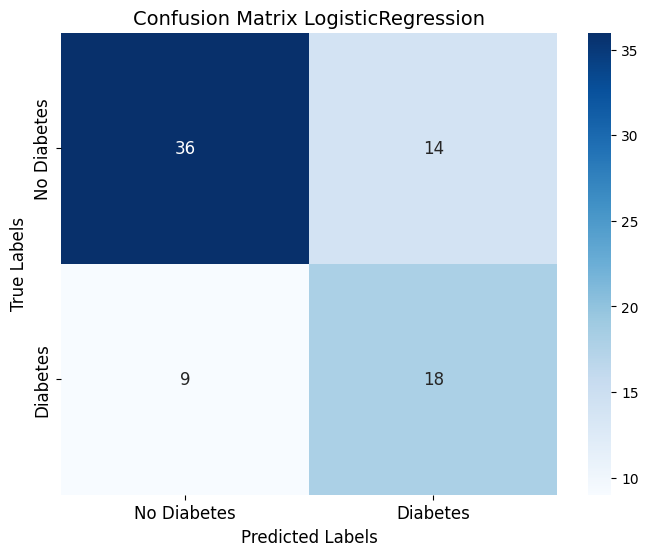


Evaluation of SVC on test data

Accuracy: 0.7012987012987013
Precision: 0.5714285714285714
Recall: 0.5925925925925926
F1 score: 0.5818181818181818

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        50
           1       0.57      0.59      0.58        27

    accuracy                           0.70        77
   macro avg       0.67      0.68      0.67        77
weighted avg       0.70      0.70      0.70        77

Confusion Matrix:
[[38 12]
 [11 16]]


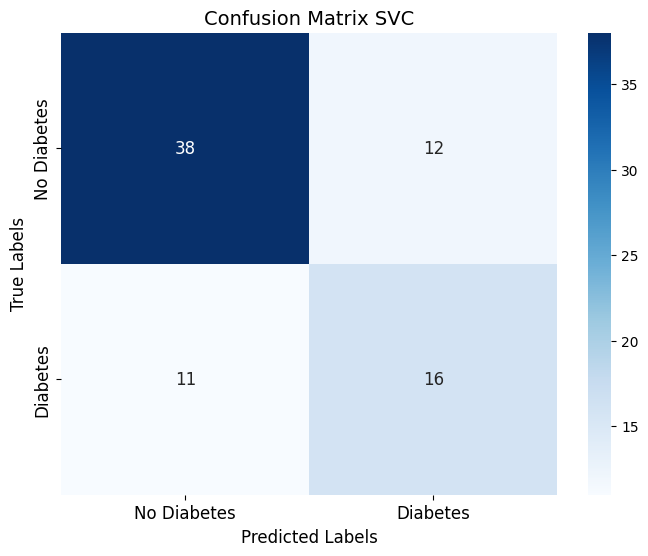


Evaluation of XGBClassifier on test data

Accuracy: 0.7272727272727273
Precision: 0.59375
Recall: 0.7037037037037037
F1 score: 0.6440677966101694

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        50
           1       0.59      0.70      0.64        27

    accuracy                           0.73        77
   macro avg       0.71      0.72      0.71        77
weighted avg       0.74      0.73      0.73        77

Confusion Matrix:
[[37 13]
 [ 8 19]]


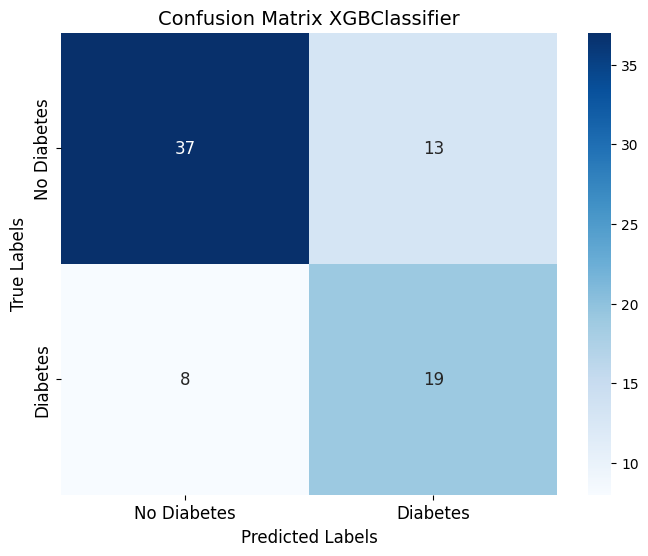

In [216]:
# Evaluasi akhir pada data uji
for model in [log_reg, svm, xgb]:
    model_name = type(model).__name__
    model.set_params(**best_params[model_name])

    # Latih model dengan hyperparameter terbaik pada seluruh data pelatihan
    model.fit(X_train_scaled, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test_scaled)

    # Hitung metrik kinerja
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Tampilkan hasil evaluasi
    print(f"\nEvaluation of {model_name} on test data\n")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 score: {f1}")

    # Tampilkan classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Tampilkan confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Tampilkan confusion matrix dengan plotting
    plotting_confusion_matrix(model, X_test_scaled, y_test, model_name)

# **5. Kesimpulan**

1. Algoritma atau model machine learning mana yang paling efektif untuk memprediksi diabetes pada dataset ini?

2. Faktor-faktor apa saja yang paling signifikan dalam memprediksi apakah seseorang akan menderita diabetes?

**JAWAB**

1. Algoritma yang memberikan performa terbaik berdasarkan metrik recall adalah XGBoost menggunakan parameter {'learning_rate': 0.6976367695253294, 'max_depth': 8, 'n_estimators': 253, 'min_child_weight': 0.0005875051517209111} dengan skor recall 70% pada data uji. Hasil confusion matrix juga menunjukkan angka False Negative (FN) yang relatif rendah, yaitu sebanyak 8 dari 77 data.

2. Berdasarkan hasil ANOVA dan matrix korelasi pada tahap EDA, faktor-faktor yang memiliki pengaruh signifikan dalam memprediksi apakah seseorang akan menderita diabetes adalah Glucose, Insulin, BMI dan Age.

